In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import train_test_split


sns.set() 

In [2]:
df = pd.read_csv("base_1ah.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Preparação de Dados

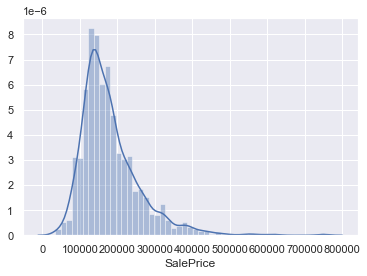

In [6]:
sns.distplot(df['SalePrice'])

In [7]:
#Função para transformar uma coluna para categórica

def to_categorical(dataset, var_list=None, var=None):
    if var == None:
        for var in var_list:
            dataset[var] = dataset[var].astype['category']
    else:
        print("Transformando a variável: "+var+" em categórica.")
        dataset[var] = dataset[var].astype("category")

In [8]:
#Função para transformar todas as colunas do dataset para categóricas

def dataset_to_categorical(dataset, var_append=None):
    var_list = []
    for column in df.columns.tolist():
        if df[column].dtypes == "object":
            var_list.append(column)
    
    var_list.append(var_append)
    
    print(str(len(var_list))+" variáveis para converter para Categórica.")
 
    for column in var_list:

        to_categorical(dataset=dataset,var=column)
                
dataset_to_categorical(df, var_append="MSSubClass")

44 variáveis para converter para Categórica.
Transformando a variável: MSZoning em categórica.
Transformando a variável: Street em categórica.
Transformando a variável: Alley em categórica.
Transformando a variável: LotShape em categórica.
Transformando a variável: LandContour em categórica.
Transformando a variável: Utilities em categórica.
Transformando a variável: LotConfig em categórica.
Transformando a variável: LandSlope em categórica.
Transformando a variável: Neighborhood em categórica.
Transformando a variável: Condition1 em categórica.
Transformando a variável: Condition2 em categórica.
Transformando a variável: BldgType em categórica.
Transformando a variável: HouseStyle em categórica.
Transformando a variável: RoofStyle em categórica.
Transformando a variável: RoofMatl em categórica.
Transformando a variável: Exterior1st em categórica.
Transformando a variável: Exterior2nd em categórica.
Transformando a variável: MasVnrType em categórica.
Transformando a variável: ExterQual

In [9]:
df.dtypes

Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object

In [10]:
#Função para gerar dataset com colunas que possuem valores missing
def gera_dataset_missing(dataset):
    df_missing = dataset.isnull().sum().to_frame().reset_index()
    df_missing.rename(columns= {0:'missing_count'}, inplace=True)
    df_missing= df_missing.sort_values("missing_count", ascending=False).reset_index()
    df_missing = df_missing[df_missing['missing_count']>0]
    return df_missing

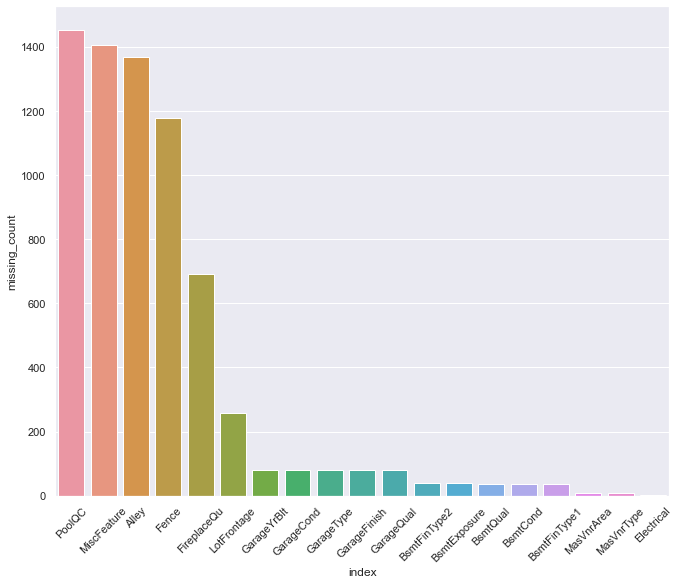

In [11]:
#Função para gerar gráfico de barra das colunas missing
def gera_grafico_barra(dataset, x_var, y_var):
    f, ax = plt.subplots(figsize=(11, 9))

    sns.barplot(x_var, y_var, data=dataset)
    plt.xticks(rotation=45)

gera_grafico_barra(gera_dataset_missing(df), "index", "missing_count")

### Tratandos os valores faltantes

In [12]:
#Colunas em que o valor faltante é normal.

df['PoolQC'] = df['PoolQC'].cat.add_categories('NO')
df['PoolQC'] = df['PoolQC'].fillna("NO")

df['MiscFeature'] = df['MiscFeature'].cat.add_categories('NO')
df['MiscFeature'] = df['MiscFeature'].fillna("NO")

df['Alley'] = df['Alley'].cat.add_categories('NO')
df['Alley'] = df['Alley'].fillna("NO")

df['Fence'] = df['Fence'].cat.add_categories('NO')
df['Fence'] = df['Fence'].fillna("NO")

df['FireplaceQu'] = df['FireplaceQu'].cat.add_categories('NO')
df['FireplaceQu'] = df['FireplaceQu'].fillna("NO")

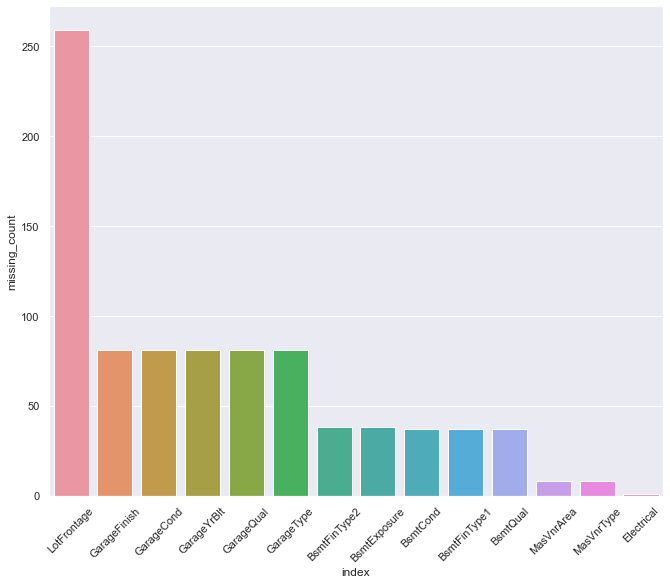

In [13]:
gera_grafico_barra(gera_dataset_missing(df), "index", "missing_count")

In [14]:
df[gera_dataset_missing(df)['index'].tolist()].head()

,LotFrontage,GarageFinish,GarageCond,GarageYrBlt,GarageQual,GarageType,BsmtFinType2,BsmtExposure,BsmtCond,BsmtFinType1,BsmtQual,MasVnrArea,MasVnrType,Electrical
0,65.0,RFn,TA,2003.0,TA,Attchd,Unf,No,TA,GLQ,Gd,196.0,BrkFace,SBrkr
1,80.0,RFn,TA,1976.0,TA,Attchd,Unf,Gd,TA,ALQ,Gd,0.0,None,SBrkr
2,68.0,RFn,TA,2001.0,TA,Attchd,Unf,Mn,TA,GLQ,Gd,162.0,BrkFace,SBrkr
3,60.0,Unf,TA,1998.0,TA,Detchd,Unf,No,Gd,ALQ,TA,0.0,None,SBrkr
4,84.0,RFn,TA,2000.0,TA,Attchd,Unf,Av,TA,GLQ,Gd,350.0,BrkFace,SBrkr


In [15]:
valid_nan_var =  ['BsmtCond',
  'BsmtFinType1',
  'BsmtQual',
  'BsmtExposure',
  'BsmtFinType2',
  'GarageCond',
  'GarageFinish',
  'GarageQual',
  'GarageType']

In [16]:
for var in valid_nan_var:
    df[var] = df[var].cat.add_categories("TNA")
    df[var] = df[var].fillna("TNA")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,12,2008,WD,Normal,250000


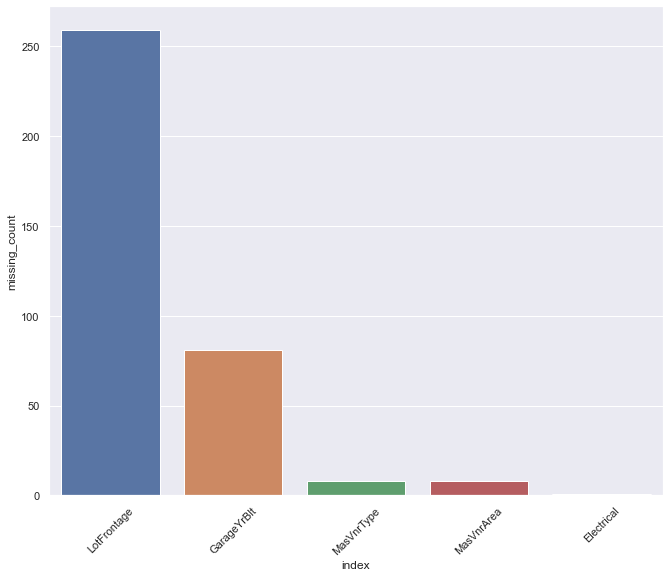

In [17]:
gera_grafico_barra(gera_dataset_missing(df), "index", "missing_count")

In [18]:
#Verificando os valores nulos
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    if sum(pd.isnull(df[column]))>0:
        if hasattr(df[column], 'cat'):
            print("Preenchendo "+column+"  com a moda.")
            df[column].fillna((df[column].mode()[0]), inplace=True)
        else:
            print("Preenchendo "+column+"  com a mediana.")
            df[column].fillna((df[column].median()), inplace=True)
        print("")   

Preenchendo LotFrontage  com a mediana.

Preenchendo MasVnrType  com a moda.

Preenchendo MasVnrArea  com a mediana.

Preenchendo Electrical  com a moda.

Preenchendo GarageYrBlt  com a mediana.



In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,...,0,NO,NO,NO,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,...,0,NO,NO,NO,0,12,2008,WD,Normal,250000


In [20]:
#Verificando os valores nulos
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    if sum(pd.isnull(df[column]))>0:
        print(column)
        print (df[column].value_counts()) 
        print("")   

## Visualização de Dados

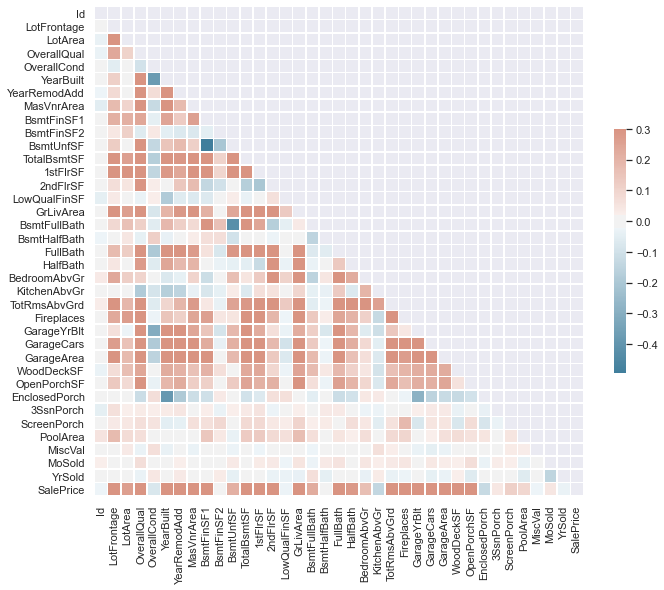

In [21]:
#Calcular a matriz de correlação
corr = df.corr()

#Remover o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Gera o mapa de cores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Desenha o heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df.describe(include="category")

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,NO,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NO,NO,NO,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


44


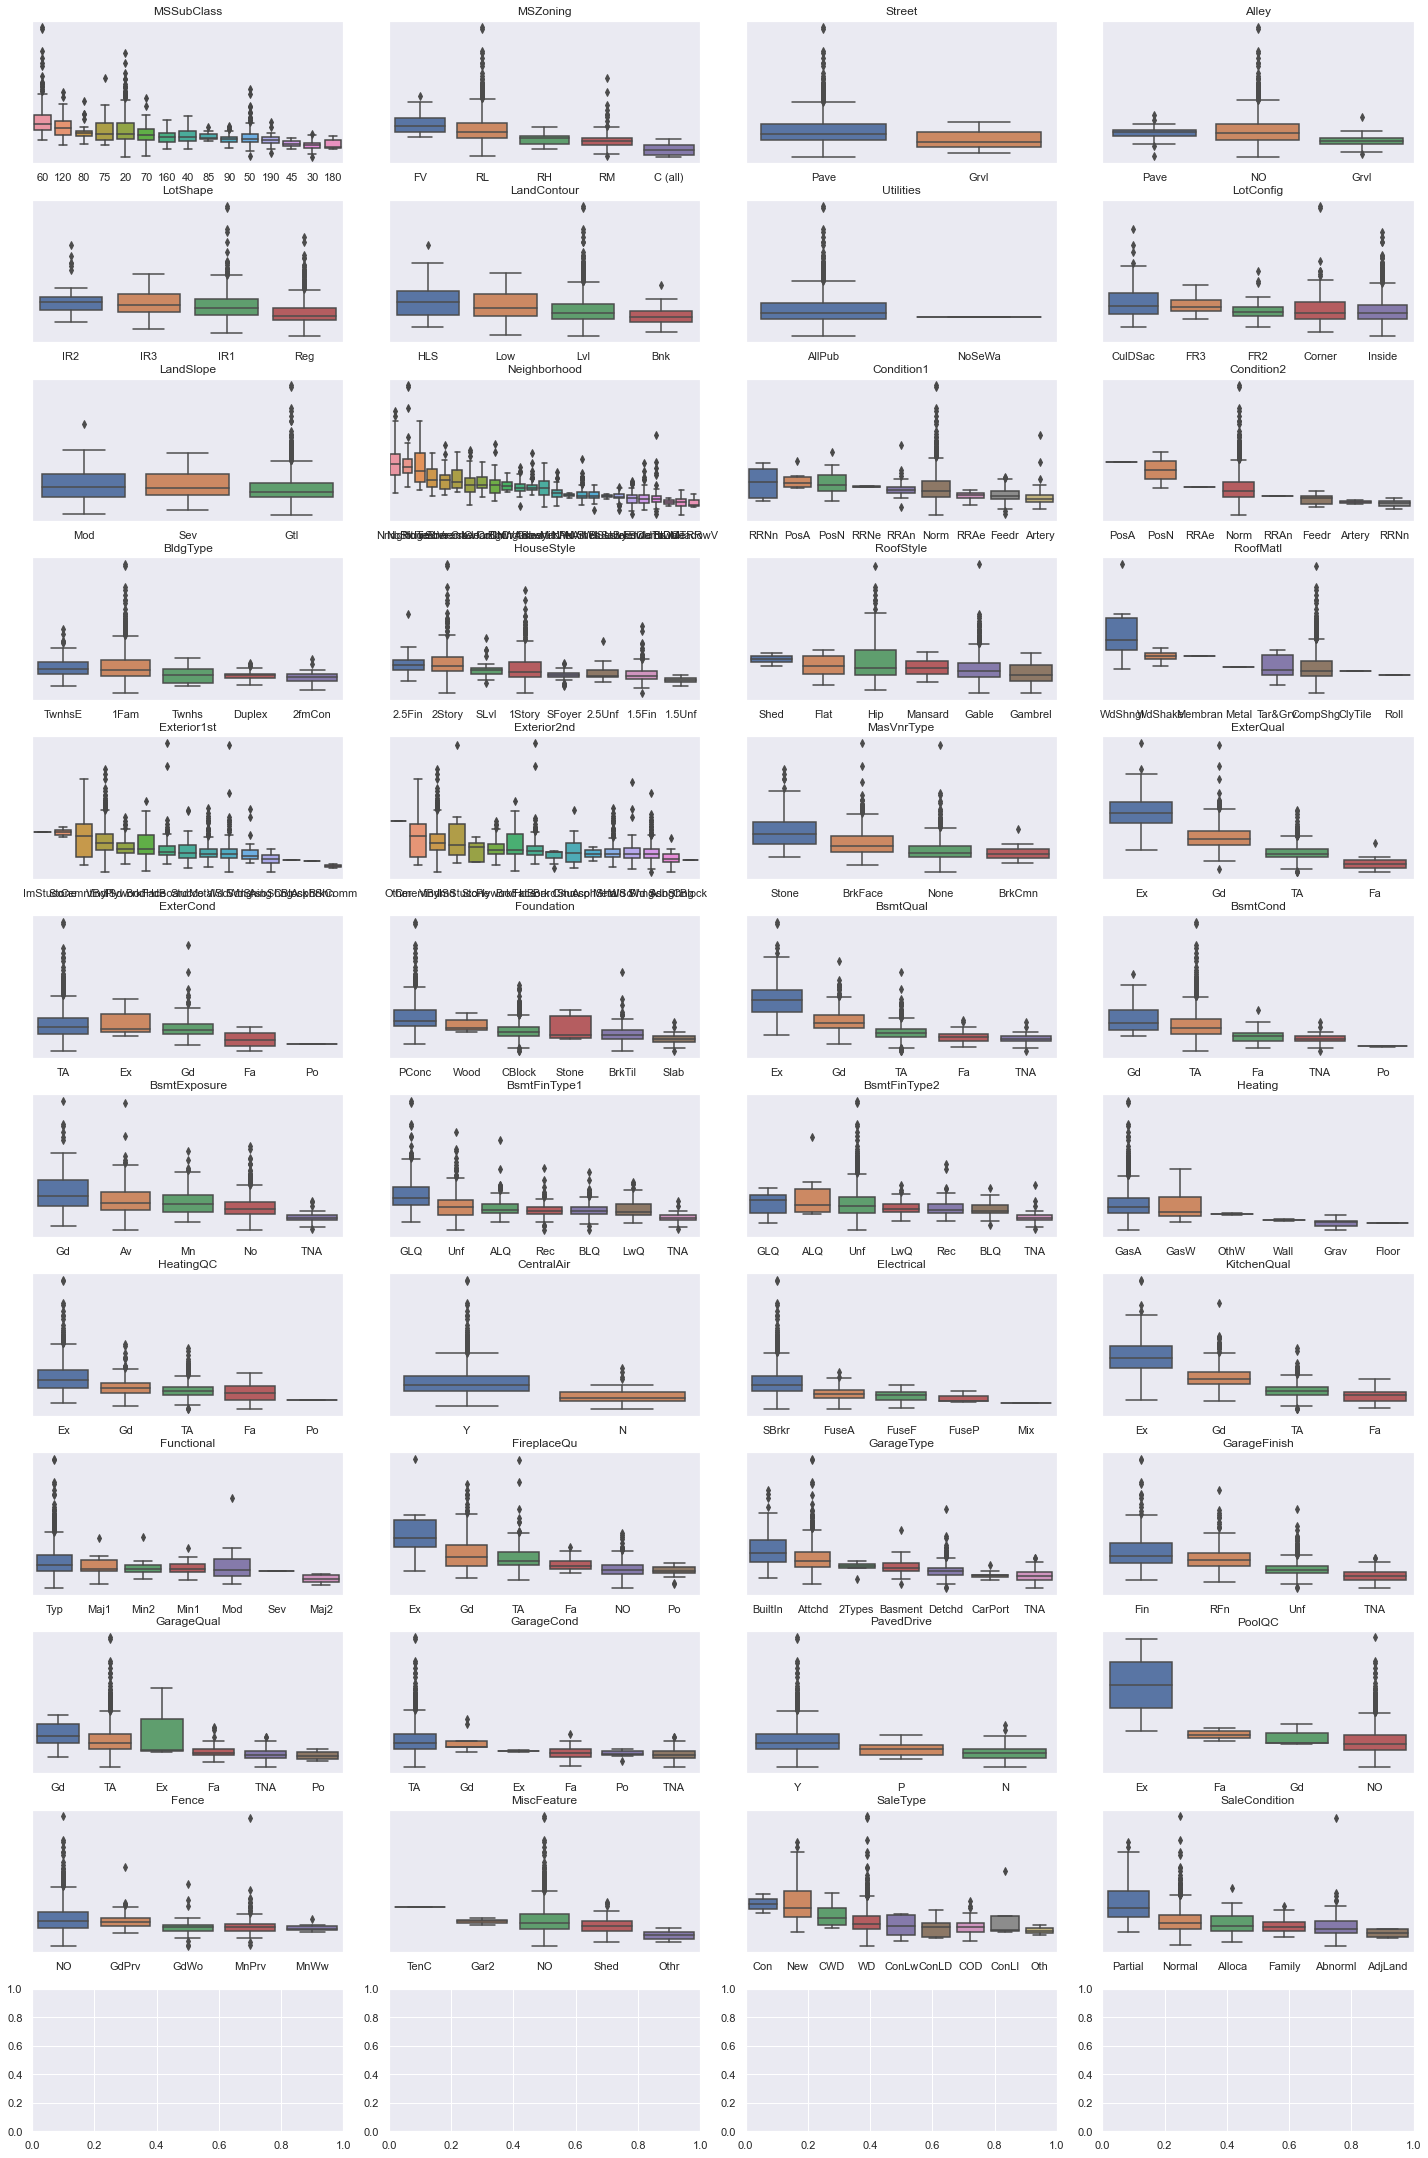

In [23]:
columns_count = df.describe(include="category").shape[1]
print(columns_count)


fig, axes = plt.subplots(int(columns_count/4)+1,4, figsize=(20,30),sharex=False, sharey=False)
fig.tight_layout() 

i = 0
for column in df.describe(include="category").columns.tolist():
    columns = []
    columns.append(column)
    columns.append("SalePrice")
    

            
    grouped = df.groupby([column])
    df2 = pd.DataFrame({col:vals['SalePrice'] for col,vals in grouped})
    meds = df2.median()

    meds.sort_values(ascending=False, inplace=True)
    df2 = df2[meds.index]

    sns.boxplot(data=df2, ax=axes[int(i/4),i%4])
    axes[int(i/4),i%4].set_title(column)
    axes[int(i/4),i%4].yaxis.set_visible(False)
    i = i + 1


## Modelagem

### Selecionando variáveis para modelagem

In [24]:
relevant_features = corr[abs(corr['SalePrice'])>0.5].index.tolist()
aditional_features = ["MSSubClass","Neighborhood","ExterQual","KitchenQual"]
relevant_features = relevant_features + aditional_features
relevant_features.remove("SalePrice")

relevant_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'MSSubClass',
 'Neighborhood',
 'ExterQual',
 'KitchenQual']

In [25]:
Feature = pd.get_dummies(df[relevant_features])


In [26]:
X = Feature
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,1,0,0,0,1,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,0,1,0,0,0,1,0,0,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,1,0,0,0,1,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,0,0,0,0,1,0,0,1,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,0,0,0,0,0,1,0,0,0,1
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,0,0,0,0,0,1,0,0,0,1
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,1,0,0,0,0,0,1,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,0,1,0


In [27]:
y = np.log(df['SalePrice']).values
y

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

def model(model_name, model):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

    pipe = Pipeline([
            ('scale', StandardScaler()),
            (model_name, model)])
    
    pipe.fit(X_train, y_train)  #fit the model
    
    y_train_ = pipe.predict(X_train)
    y_test_ = pipe.predict(X_test)
    
   



    res_train = pd.DataFrame(
        {'Observed_Train': y_train, 
         'Predicted_Train': y_train_, 
         'Residual_Train': y_train - y_train_})
    res_test = pd.DataFrame(
        {'Observed_Test': y_test, 
         'Predicted_Test': y_test_, 
         'Residual_Test': y_test - y_test_})

    res_dataset = pd.concat([res_train, res_test], axis=1)
    res_dataset.index = [model_name] * len(res_dataset)
    
    
    scores = [model_name,
            round(np.mean(np.absolute(y_train_ - y_train)),2),
            round(np.mean((y_train_ - y_train) ** 2),2),
            round(r2_score(y_train_ , y_train),2),
            round(np.mean(np.absolute(y_test_ - y_test)),2),
            round(np.mean((y_test_ - y_test) ** 2),2),
            round(r2_score(y_test_ , y_test),2)]
    
 
    scores_df = pd.DataFrame(columns=['Model',
                            'Train Root Mean Squared Error - RMSE',
                            'Train Mean Absolute Error - RMSE',
                            'Train Score',
                            'Teste Root Mean Squared Error - RMSE',
                            'Teste Mean Absolute Error - RMSE',
                            'Teste Score'])
    scores_df.loc[len(scores_df)] = scores
    
    
    return res_dataset, scores_df

In [29]:
def resid_graphs(dataset):

    fig, axis = plt.subplots(2, 2, figsize = (12, 8))

    # Residual distribution (Train)
    g1 = sns.distplot(dataset["Residual_Train"], ax = axis[0][0])
    g1.set_title("Residual distribution (Train)")

    # Residual x Fitted (Train)
    g2 = sns.residplot(y = "Residual_Train", x = "Predicted_Train",data = dataset, ax = axis[0][1])
    g2.set_title('Residual x Prediction (Train)')

    # Residual distribution (Test)
    g3 = sns.distplot(dataset["Residual_Test"], ax = axis[1][0])
    g3.set_title("Residual distribution (Test)")

    # Residual x Fitted (Test)
    g4 = sns.residplot(y = "Residual_Test", x = "Predicted_Test", data = dataset, ax = axis[1][1])
    g4.set_title('Residual x Prediction (Test)')
    plt.pause(0.05)
    fig.tight_layout()

## Mostrando os resultados

Model,Train Root Mean Squared Error - RMSE,Train Mean Absolute Error - RMSE,Train Score,Teste Root Mean Squared Error - RMSE,Teste Mean Absolute Error - RMSE,Teste Score
Linear Regression,0.1,0.02,0.84,0.1,0.02,0.85


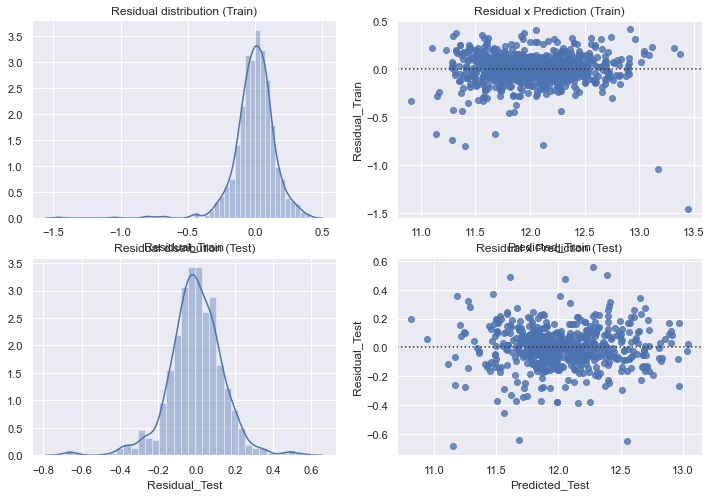

Model,Train Root Mean Squared Error - RMSE,Train Mean Absolute Error - RMSE,Train Score,Teste Root Mean Squared Error - RMSE,Teste Mean Absolute Error - RMSE,Teste Score
K-Nearest Neighbors Regression,0.11,0.02,0.83,0.13,0.03,0.73


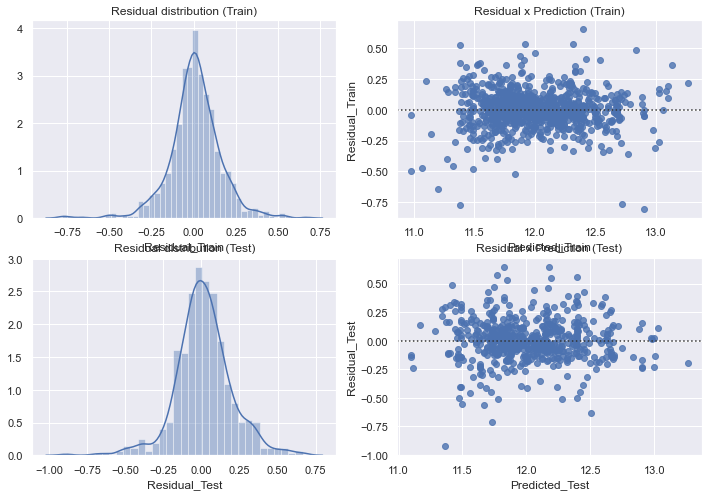

Model,Train Root Mean Squared Error - RMSE,Train Mean Absolute Error - RMSE,Train Score,Teste Root Mean Squared Error - RMSE,Teste Mean Absolute Error - RMSE,Teste Score
Decision Tree Regression,0.0,0.0,1.0,0.14,0.04,0.75


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


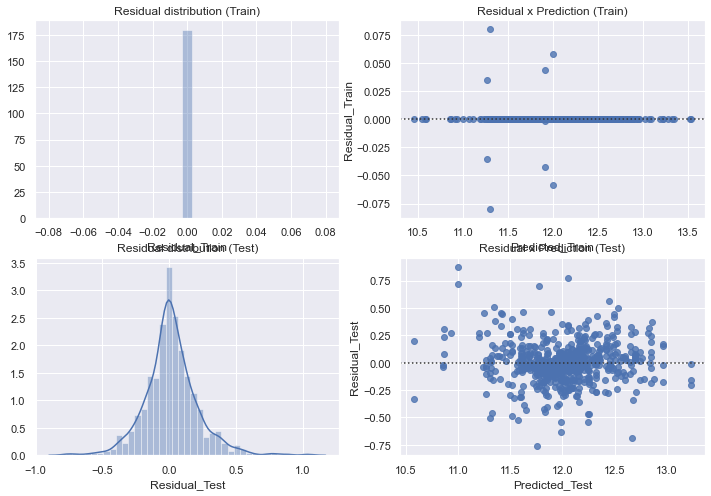

Model,Train Root Mean Squared Error - RMSE,Train Mean Absolute Error - RMSE,Train Score,Teste Root Mean Squared Error - RMSE,Teste Mean Absolute Error - RMSE,Teste Score
Bayesian Ridge Regression,0.1,0.02,0.83,0.1,0.02,0.85


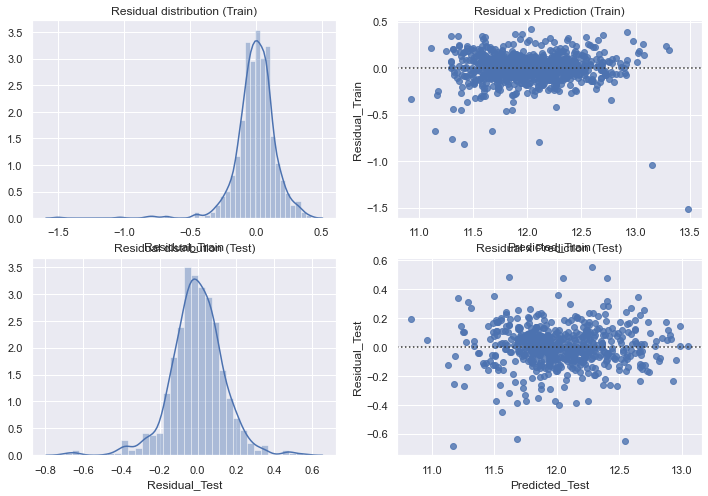

Model,Train Root Mean Squared Error - RMSE,Train Mean Absolute Error - RMSE,Train Score,Teste Root Mean Squared Error - RMSE,Teste Mean Absolute Error - RMSE,Teste Score
Random Forest Regression,0.04,0.0,0.97,0.1,0.02,0.83


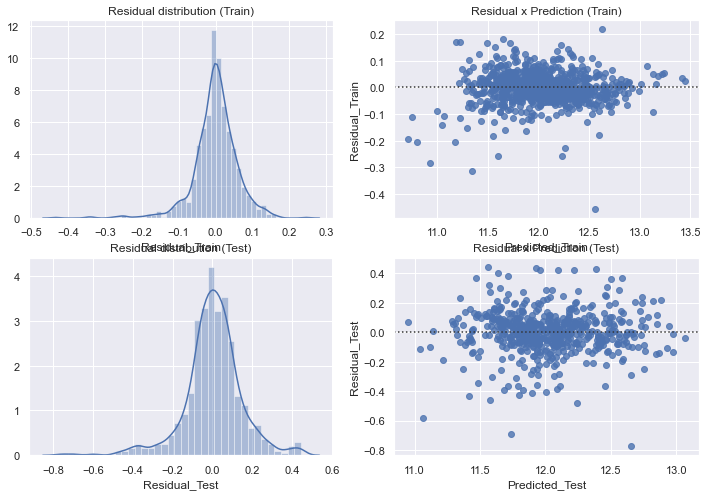

Model,Train Root Mean Squared Error - RMSE,Train Mean Absolute Error - RMSE,Train Score,Teste Root Mean Squared Error - RMSE,Teste Mean Absolute Error - RMSE,Teste Score
Stochastic Gradient Descenty,0.11,0.03,0.84,0.11,0.02,0.85


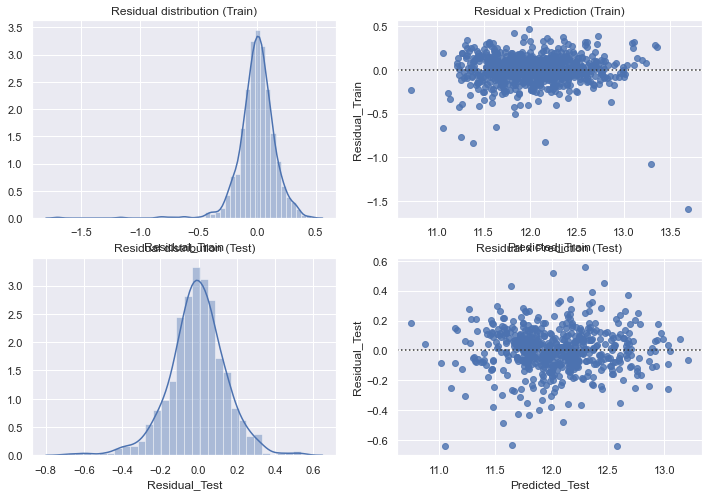

In [30]:
from IPython.display import display, HTML

model_list = [["Linear Regression",LinearRegression()],
              ["K-Nearest Neighbors Regression",KNeighborsRegressor(n_neighbors = 4)],
              ["Decision Tree Regression",DecisionTreeRegressor(random_state = 0)],
              ["Bayesian Ridge Regression",BayesianRidge(compute_score=True) ],
              ["Random Forest Regression",RandomForestRegressor(n_estimators = 1000, random_state = 42)],
              ["Stochastic Gradient Descenty",SGDRegressor(max_iter=1000, tol=1e-3)]]

for model_nm, model_obj in model_list:
    res_dataset, scores_df = model(model_nm,model_obj)    
    display(HTML(scores_df.to_html(index=False)))
    resid_graphs(res_dataset)
    plt.show()


# model("Linear Regression",LinearRegression())
# model("K-Nearest Neighbors Regression",KNeighborsRegressor(n_neighbors = 4))
# model("Decision Tree Regression",DecisionTreeRegressor(random_state = 0) )
# model("Bayesian Ridge Regression",BayesianRidge(compute_score=True) )
# model("Random Forest Regression",RandomForestRegressor(n_estimators = 1000, random_state = 42))
# model("Stochastic Gradient Descenty",SGDRegressor(max_iter=1000, tol=1e-3))